## Sample 6.3 Why we choose 1/sigma**2 as the non-informative prior

In [1]:
%matplotlib inline

import numpy as np
import scipy.stats as stats
import scipy.special as special
import matplotlib.pyplot as plt
import matplotlib
import astropy.io.fits as fits

matplotlib.rc('xtick',labelsize=12)
matplotlib.rc('ytick',labelsize=12)


# test why $\sigma^2$ does not converged in a Gaussian distribution
Consider how  $p=\frac{1}{\sigma}\exp({-\frac{y^2}{\sigma^2}})$ varies with increasing $\sigma$.

Or how  $q=\frac{1}{\sigma^{3/2}}\exp({-\frac{y^2}{\sigma^2}})$ varies with $\sigma$.

In the following plot, we show the difference between $\int_0^{\sigma}p(t)dt-\int_0^{\sigma}q(t)dt$ as a function of $\sigma$ and find that it approaches to infinity when $\sigma$ increases.

If the number of data, $n$ is large, then the non-informative prior is not necessarily to be $1/\sigma^2$.

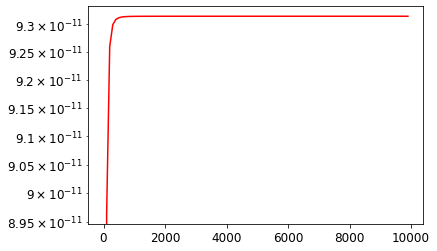

In [2]:
s2 = np.arange(1e-5,10000,100)
y = np.random.normal(0,3)
n = 10#len(y)
p = np.array([np.sum(-y**2/(2.*s2[i]))-0.5*n*np.log(s2[i]) for i in range(len(s2))])
p2 = np.array([np.sum(-y**2/(2.*s2[i]))-(0.5*n+1)*np.log(s2[i]) for i in range(len(s2))])
plt.plot(s2,np.cumsum(np.exp(p))-np.cumsum(np.exp(p2)),'r-')
plt.yscale('log')

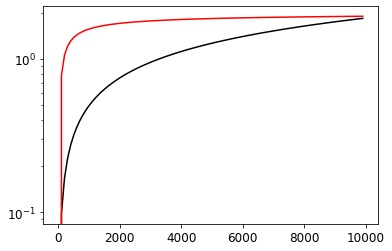

In [10]:
plt.plot(s2,np.cumsum(np.exp(p)),'k-')
plt.plot(s2,np.cumsum(np.exp(p2))*800,'r-')
plt.yscale('log')